In [1]:
!pip install miceforest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.6 MB/s eta 0:00:00


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from miceforest import ImputationKernel
from scipy import stats

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report,confusion_matrix,roc_auc_score, accuracy_score

# 1.Load Data

In [3]:
def load_data():
  # Connecting to Google Drive
  drive.mount('/content/drive')
  # Path to the data file in Google Drive
  file_path = '/content/drive/MyDrive/Final/churn_rate_prediction.csv'
  # Read data
  df = pd.read_csv(file_path)
  return df

df = load_data()

Mounted at /content/drive


In [4]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [5]:
df.tail()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
36987,fffe43004900440035003500390036003100,Cuc Tarr,46,F,6F51HFO,NaN,Basic Membership,2017-09-21,No,xxxxxxxx,...,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,4
36988,fffe43004900440033003500380036003600,Jenni Stronach,29,F,21KSM8Y,Town,Basic Membership,2016-06-27,No,xxxxxxxx,...,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,fffe4300490044003500330034003100,Luciana Kinch,23,F,XK1IM9H,NaN,Basic Membership,2016-09-11,Yes,CID3838,...,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4
36990,fffe43004900440031003200390039003000,Tawana Ardoin,53,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,No,xxxxxxxx,...,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3
36991,fffe43004900440033003600340034003200,Verlene Beaulieu,35,M,LBX0GLR,Town,Silver Membership,2015-10-23,No,xxxxxxxx,...,79.180000,2189.68,Error,719.970000,Yes,No,No,Not Applicable,Quality Customer Care,2


# 2. Data Analyst

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [7]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [8]:
# check null
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [9]:
## unique values of each columns
for col in df.columns:
  print('{} has {} unique values.'.format(col, df[col].nunique()))

customer_id has 36992 unique values.
Name has 36992 unique values.
age has 55 unique values.
gender has 3 unique values.
security_no has 36992 unique values.
region_category has 3 unique values.
membership_category has 6 unique values.
joining_date has 1096 unique values.
joined_through_referral has 3 unique values.
referral_id has 11359 unique values.
preferred_offer_types has 3 unique values.
medium_of_operation has 4 unique values.
internet_option has 3 unique values.
last_visit_time has 30101 unique values.
days_since_last_login has 27 unique values.
avg_time_spent has 25961 unique values.
avg_transaction_value has 36894 unique values.
avg_frequency_login_days has 1654 unique values.
points_in_wallet has 23699 unique values.
used_special_discount has 2 unique values.
offer_application_preference has 2 unique values.
past_complaint has 2 unique values.
complaint_status has 5 unique values.
feedback has 9 unique values.
churn_risk_score has 6 unique values.


## Categorical Features

In [10]:
# In this case, categorical columns have <= 9 unique values
cat_col = []
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    if unique_values <= 9:
        cat_col.append(column_name)

<Axes: xlabel='count', ylabel='churn_risk_score'>

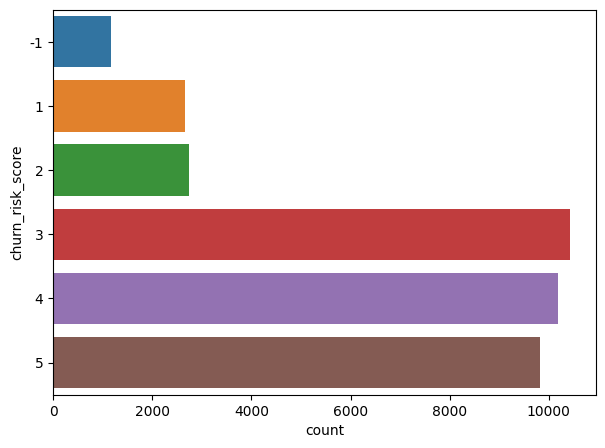

In [11]:
### Target column
plt.figure(figsize = (7,5))
sns.countplot(y = 'churn_risk_score'  , data = df)

<Axes: xlabel='count', ylabel='feedback'>

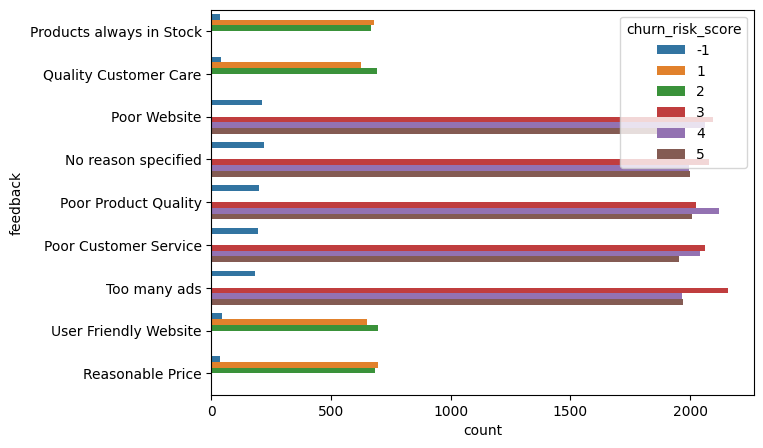

In [12]:
### Feedback by Churn_risk_score
plt.figure(figsize = (7,5))
sns.countplot(hue = 'churn_risk_score' , y = 'feedback' , data = df)

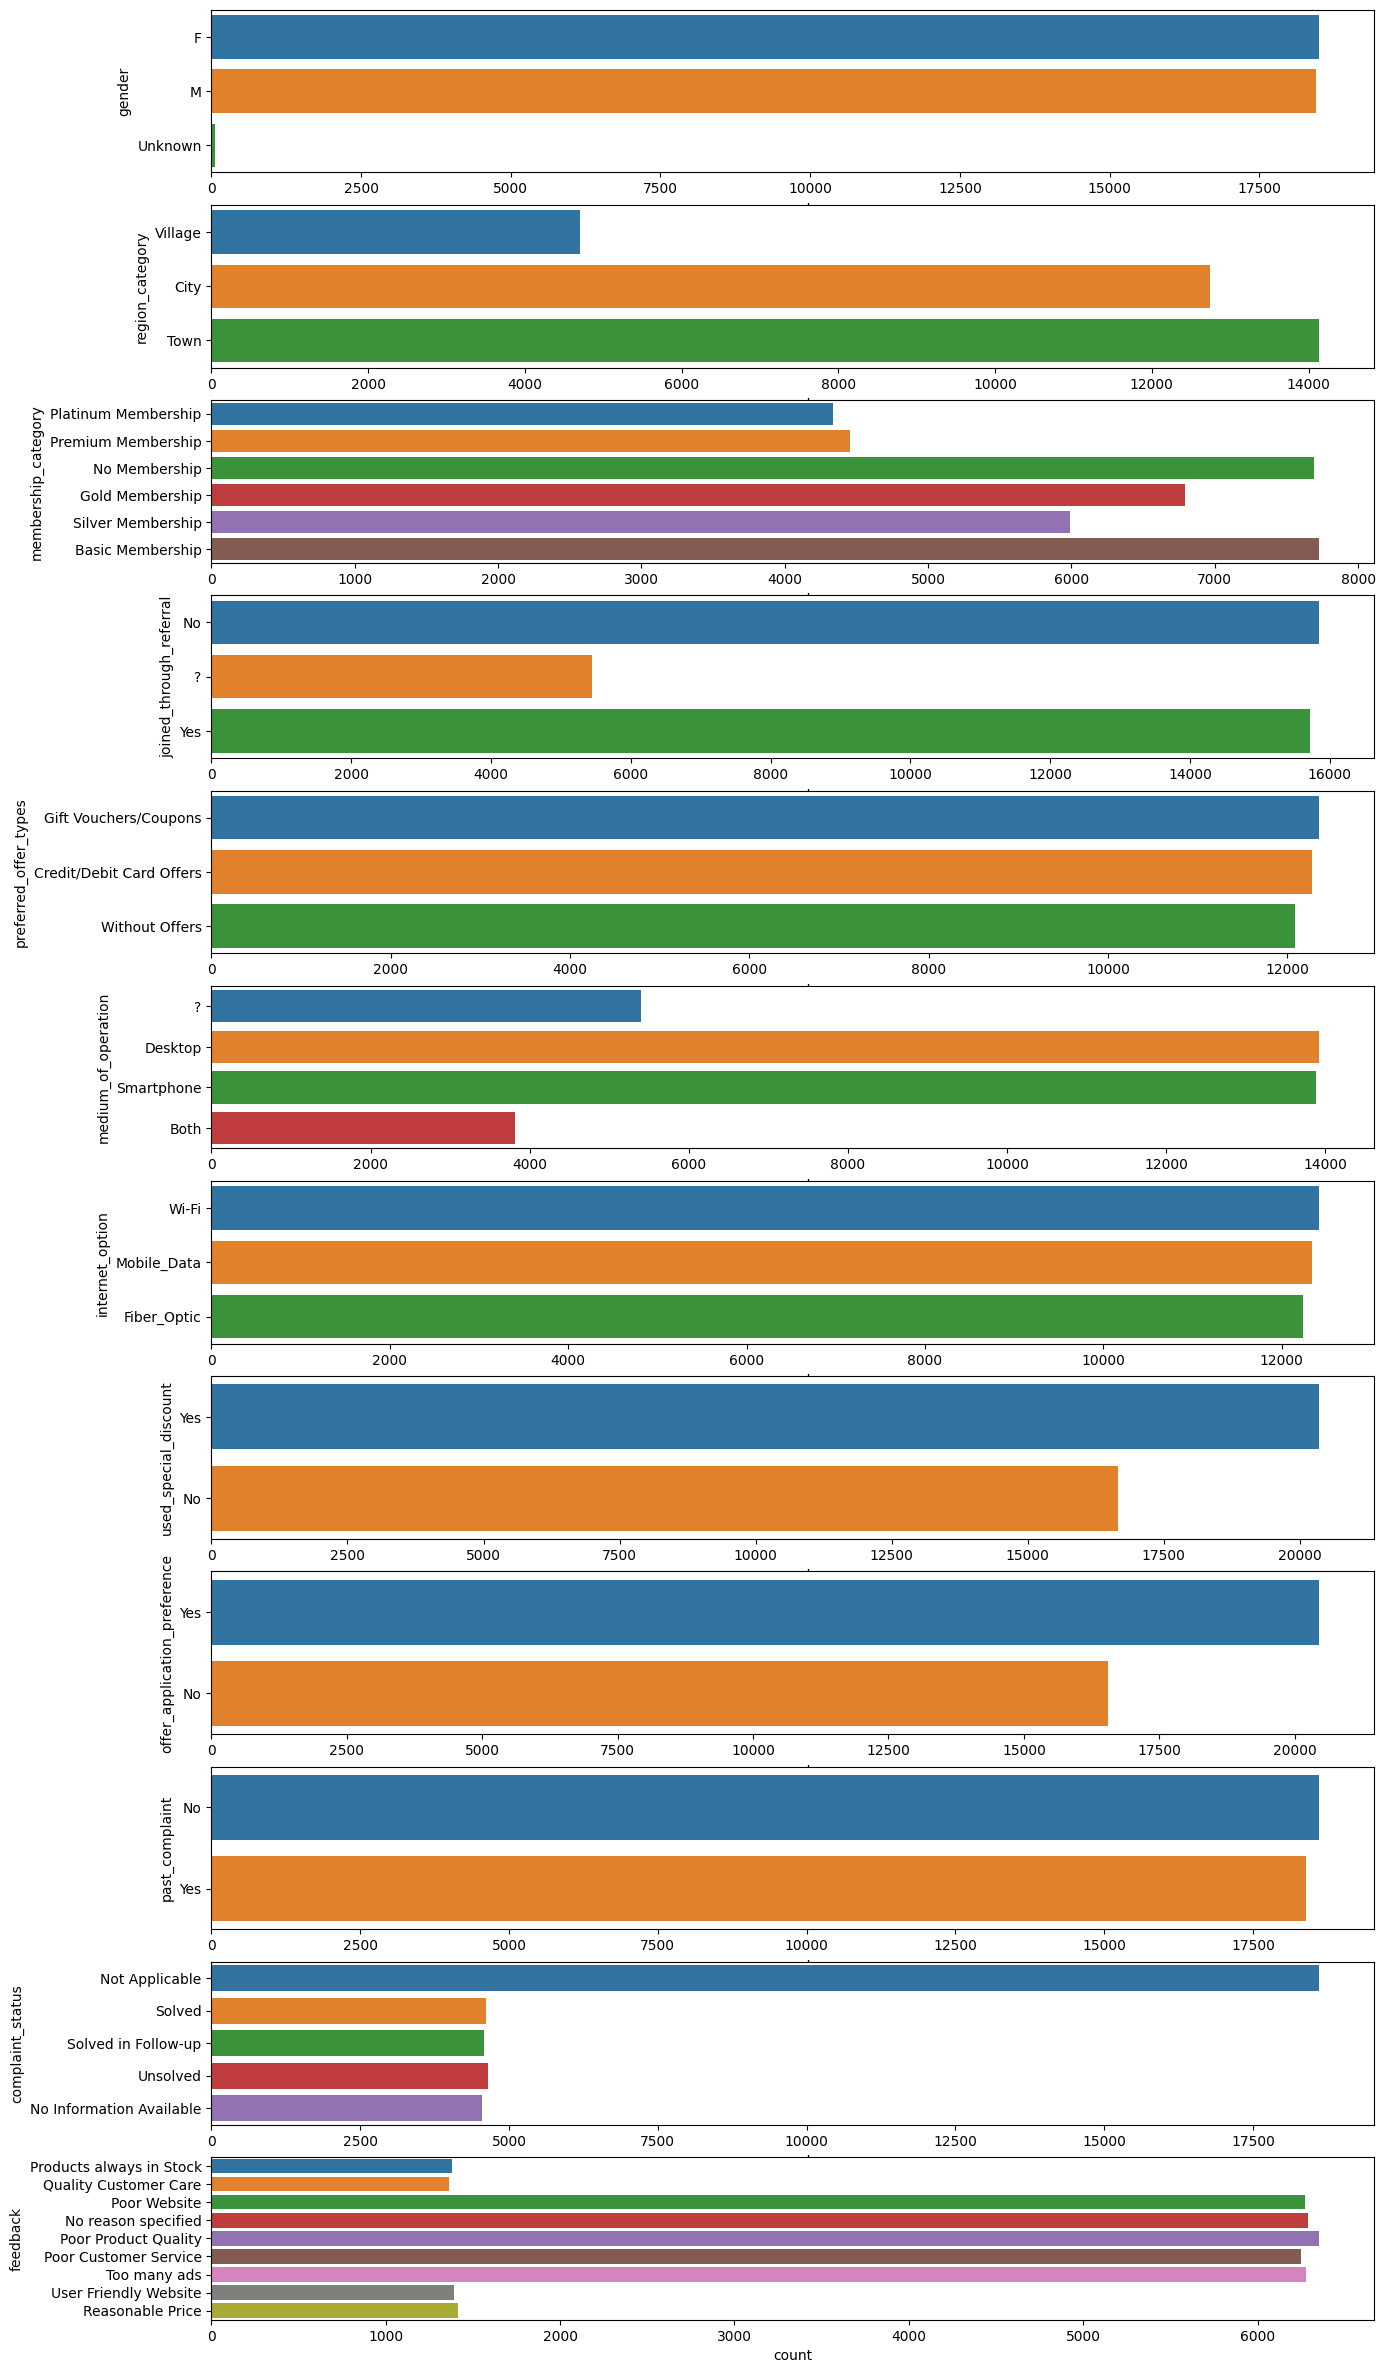

In [13]:
### other features
i = 1
plt.figure(figsize = (15,30))
for feature in cat_col[:-1]:
    plt.subplot(12,1,i)
    sns.countplot(y = feature , data = df)
    i +=1

### Features with undefined values
- "Region_category" has NULL values

- "Medium_of_operation" has "?" symbols

- "Joined_through_referral" has "?" symbols

  ⟹ Convert all these values to np.nan
- "churn_risk_score" has a value of '-1' replaced by 'np.nan'
- In addition, "Referral_id" has undefined values 'xxxxx'. However, this column will be dropped.

## Non-Categorical Features

In [14]:
other = [x for x in df.columns if x not in cat_col]
other

['customer_id',
 'Name',
 'age',
 'security_no',
 'joining_date',
 'referral_id',
 'last_visit_time',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

### Features with undefined values
- "Days_since_last_login" has a value of -999

- "avg_frequency_login_days" has "Error" values and negative values

- "Avg_time_spent" has negative values

- "points_in_wallet" has empty values and negative values

⟹ Convert all these values to np.nan

# 3. Preprocessing Data

In [15]:
def replace_incorrect_data(df):
  df['joined_through_referral'] =  df['joined_through_referral'].apply(lambda x: np.nan if x == '?' else x)
  df['medium_of_operation'] =  df['medium_of_operation'].apply(lambda x: np.nan if x == '?' else x)
  df['points_in_wallet'] = df['points_in_wallet'].apply(lambda x: np.nan if x < 0 else x)
  df['days_since_last_login'] = df['days_since_last_login'].apply(lambda x: np.nan if x < 0 else x)
  df['avg_frequency_login_days'] = df['avg_frequency_login_days'].apply(lambda x: np.nan if x == 'Error' or (x != 'Error' and float(x) < 0)  else x)
  df['avg_time_spent'] = df['avg_time_spent'].apply(lambda x: np.nan if x < 0 else x)
  df['churn_risk_score'] =  df['churn_risk_score'].apply(lambda x: np.nan if x == -1  else x)
  return df

def features_selection(df):
  drop_list =['Name','customer_id','Name','security_no','joining_date','last_visit_time','referral_id']
  df.drop(drop_list, axis = 1, inplace =True)
  return df

def convert_categorical_to_numerical(df):
    df['avg_frequency_login_days'] = df['avg_frequency_login_days'].astype(float)
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype('category').cat.codes
            df[col] = df[col].replace(-1, np.nan)
    return df

# Replace NULL data with prediction model
def fill_missing_values(df):
  kernel = ImputationKernel(df, random_state= 42)
  kernel.mice(iterations = 10)
  imputed_data = kernel.complete_data()
  return imputed_data

def remove_outliers(df):
  z_scores = stats.zscore(df)
  threshold = 3  # Adjust the threshold as needed
  data_iqr = df[(z_scores < threshold).all(axis=1)]
  return data_iqr

def preprocessing_data(df):
  # Drop unnecessary columns
  df = features_selection(df)
  # Replace incorrect data
  df = replace_incorrect_data(df)
  # Normalize data
  df = convert_categorical_to_numerical(df)
  # Fill missing values
  df = fill_missing_values(df)
  # remove outlier
  df = remove_outliers(df)
  return df

In [16]:
data_imputed = preprocessing_data(df.copy())
data_imputed.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,0,2.0,3,0.0,1.0,1.0,2,17.0,300.63,53005.25,17.0,781.75,1,1,0,1,4,2.0
1,32,0,0.0,4,0.0,1.0,1.0,1,16.0,306.34,12838.38,10.0,847.53,1,0,1,2,5,1.0
2,44,0,1.0,2,1.0,1.0,1.0,2,14.0,516.16,21027.00,22.0,500.69,0,1,1,3,3,5.0
3,37,1,0.0,2,1.0,1.0,1.0,1,11.0,53.27,25239.56,6.0,567.66,0,1,1,4,3,5.0
4,31,0,0.0,2,0.0,0.0,2.0,1,20.0,113.13,24483.66,16.0,663.06,0,1,1,2,3,5.0


In [17]:
data_imputed.shape

(34733, 19)

<Axes: >

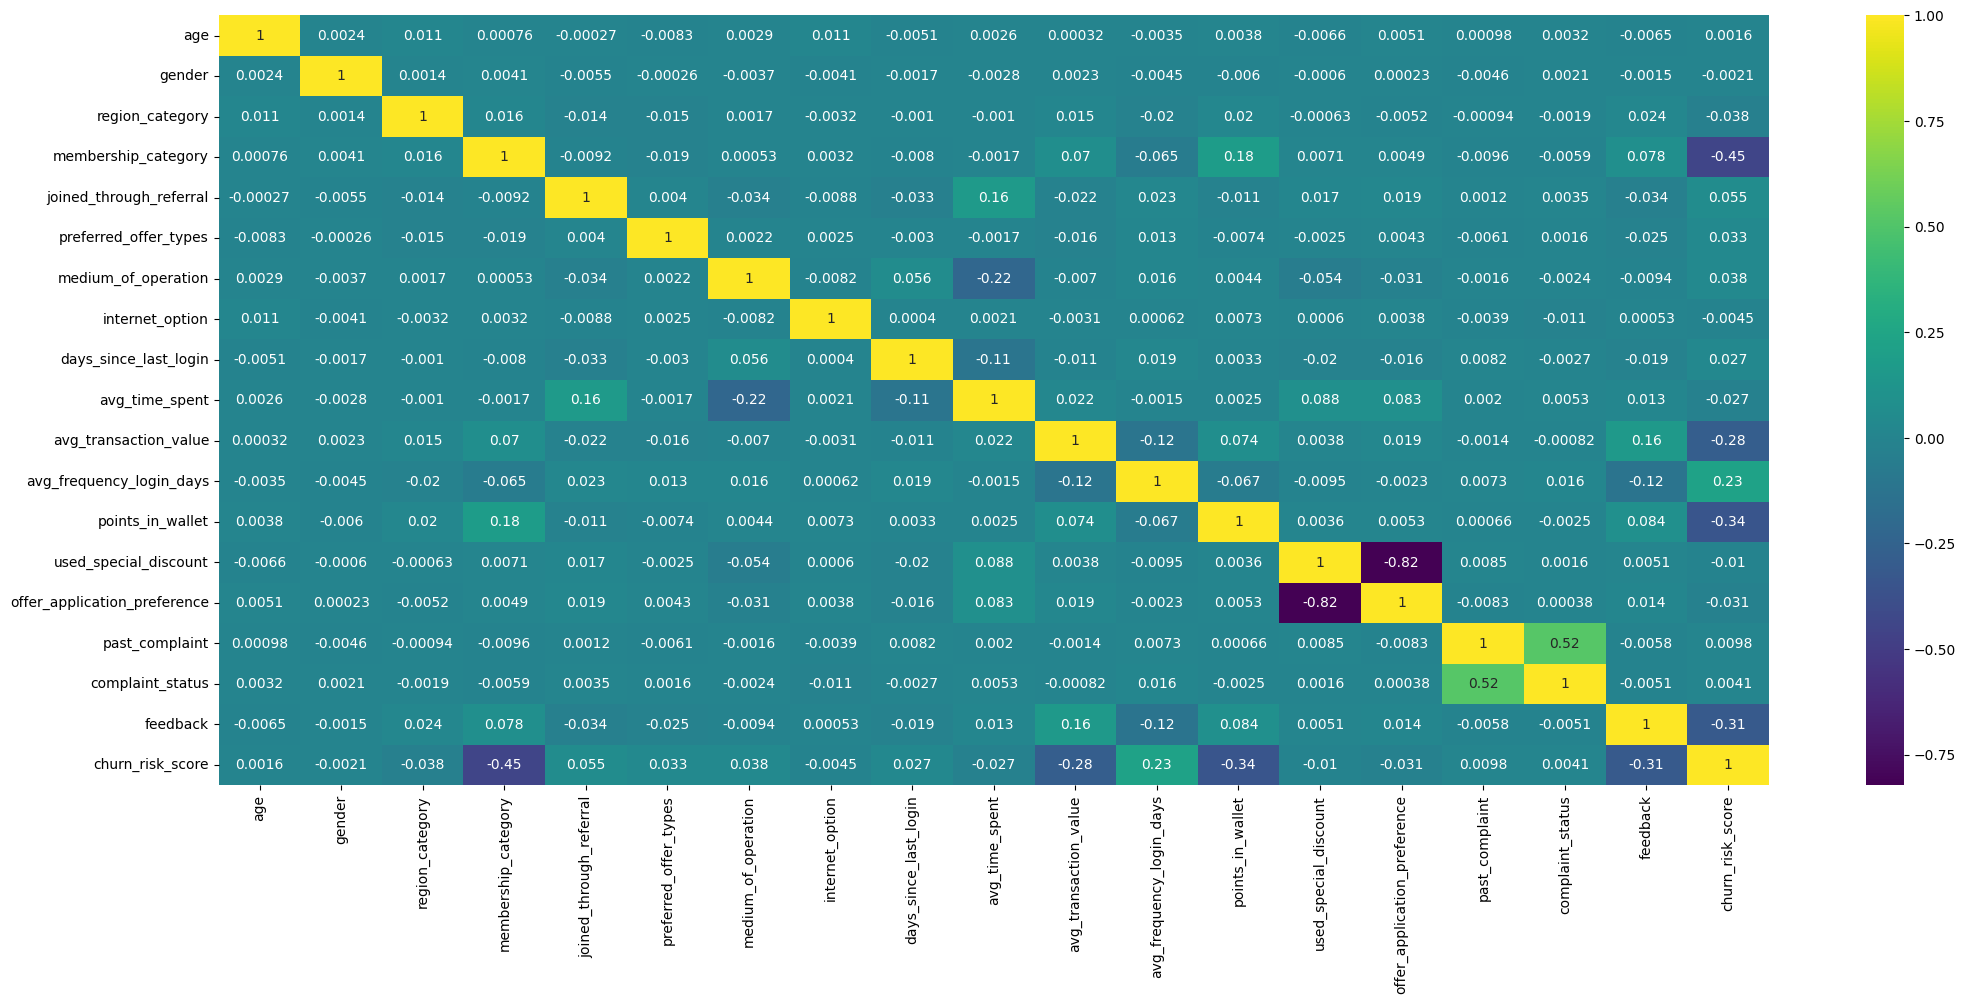

In [18]:
plt.figure(figsize=(25,10))
sns.heatmap(data_imputed.corr(),annot = True, cmap ='viridis')

In [19]:
data_imputed.describe()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
count,34733.000000,34733.000000,34733.000000,34733.000000,34733.000000,34733.000000,34733.000000,34733.000000,34733.000000,34733.000000,34733.000000,34733.000000,34733.000000,34733.000000,34733.000000,34733.000000,34733.000000,34733.000000,34733.000000
mean,37.129445,0.503009,0.741427,2.220165,0.496070,0.996891,1.326491,1.006392,12.800219,263.587125,27971.577700,16.319719,681.699630,0.547203,0.550226,0.496675,1.624565,3.012812,3.656379
std,15.869334,0.503327,0.696745,1.739328,0.499992,0.815667,0.669751,0.816601,5.566091,270.683575,17349.133642,7.711249,171.984534,0.497774,0.497478,0.499996,1.217274,2.547563,1.143986
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.837399,800.460000,0.009208,6.432208,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,9.000000,69.480000,13882.700000,10.000000,615.230000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000
50%,37.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,13.000000,168.080000,26971.490000,16.000000,694.370000,1.000000,1.000000,0.000000,1.000000,2.000000,4.000000
75%,51.000000,1.000000,1.000000,4.000000,1.000000,2.000000,2.000000,2.000000,17.000000,350.030000,40034.870000,23.000000,760.540000,1.000000,1.000000,1.000000,2.000000,5.000000,5.000000
max,64.000000,2.000000,2.000000,5.000000,1.000000,2.000000,2.000000,2.000000,26.000000,1285.284344,87593.490000,41.705748,1248.197679,1.000000,1.000000,1.000000,4.000000,8.000000,5.000000


# 4. Build Model

In [20]:
df2 = data_imputed[['membership_category','region_category','points_in_wallet','feedback','churn_risk_score']]

## Split Data

In [21]:
X = df2.drop(columns = 'churn_risk_score').values
y = df2['churn_risk_score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

## ML model

### SVM

In [52]:
def Build_model(X_train, y_train):
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=4)),
        ('svm', SVC(kernel='rbf',random_state = 1))
    ])
    model = pipe.fit(X_train, y_train)
    return model

SVM_Model = Build_model(X_train, y_train)

accuracy 0.7446379732258529
precision 0.7381108647075434
recall 0.7059802129798325
F1 0.7188095046015841
Classification Report
               precision    recall  f1-score   support

         1.0       0.73      0.68      0.70       464
         2.0       0.73      0.56      0.64       460
         3.0       0.83      0.88      0.85      2059
         4.0       0.69      0.62      0.65      2001
         5.0       0.71      0.79      0.75      1963

    accuracy                           0.74      6947
   macro avg       0.74      0.71      0.72      6947
weighted avg       0.74      0.74      0.74      6947



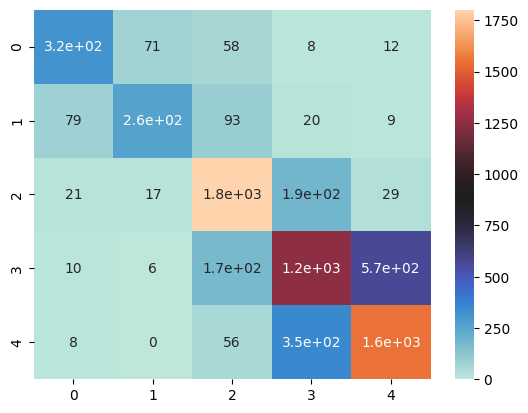

In [53]:
def evaluate_model(y_true, y_pred):
    print("accuracy", accuracy_score(y_true, y_pred))
    print("precision", precision_score(y_true, y_pred,average= 'macro'))
    print("recall", recall_score(y_true, y_pred,average= 'macro'))
    print("F1", f1_score(y_true, y_pred,average= 'macro'))

    report = classification_report(y_true, y_pred)
    print("Classification Report\n",report)

    cm = confusion_matrix(y_true,y_pred)
    sns.heatmap(cm , annot = True,cmap ='icefire')

# Sử dụng pipeline để dự đoán kết quả trên tập kiểm tra
y_pred = SVM_Model.predict(X_test)
evaluate_model(y_test, y_pred)

### Decision Tree

accuracy 0.781056571181805
precision 0.7774078878782016
recall 0.7758274435120697
F1 0.7765269998071671
Classification Report
               precision    recall  f1-score   support

         1.0       0.78      0.76      0.77       464
         2.0       0.77      0.78      0.77       460
         3.0       0.91      0.93      0.92      2059
         4.0       0.68      0.67      0.68      2001
         5.0       0.75      0.74      0.75      1963

    accuracy                           0.78      6947
   macro avg       0.78      0.78      0.78      6947
weighted avg       0.78      0.78      0.78      6947



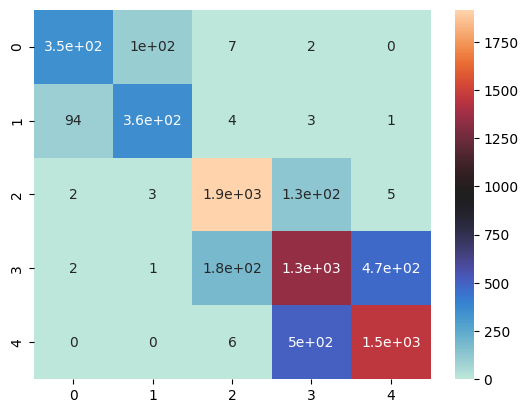

In [56]:
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=4)),
        ('clf', DecisionTreeClassifier(random_state = 42))
    ])
model = pipe.fit(X_train, y_train)
predictions = model.predict(X_test)
evaluate_model(y_test, predictions)

### Random Forest

accuracy 0.7886857636389809
precision 0.7846461684012401
recall 0.7851017170950734
F1 0.7848496078310798
Classification Report
               precision    recall  f1-score   support

         1.0       0.78      0.78      0.78       464
         2.0       0.78      0.78      0.78       460
         3.0       0.92      0.94      0.93      2059
         4.0       0.69      0.68      0.68      2001
         5.0       0.75      0.75      0.75      1963

    accuracy                           0.79      6947
   macro avg       0.78      0.79      0.78      6947
weighted avg       0.79      0.79      0.79      6947



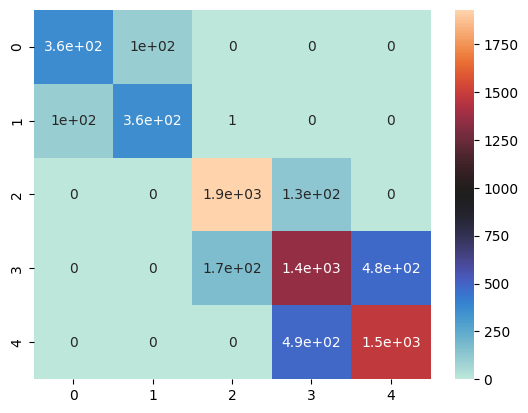

In [57]:
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', RandomForestClassifier(n_estimators=100, random_state=1))
    ])
model = pipe.fit(X_train, y_train)
predictions = model.predict(X_test)
evaluate_model(y_test, predictions)

### XGBoot

accuracy 0.8039441485533324
precision 0.7982437667341772
recall 0.7983571254290915
F1 0.795941793565004
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       464
           1       0.80      0.77      0.78       460
           2       0.92      0.94      0.93      2059
           3       0.76      0.62      0.68      2001
           4       0.74      0.85      0.79      1963

    accuracy                           0.80      6947
   macro avg       0.80      0.80      0.80      6947
weighted avg       0.80      0.80      0.80      6947



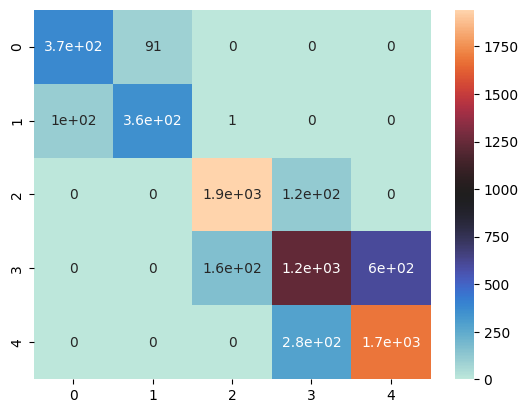

In [59]:
y_train_xgb = y_train.astype(int) - 1
y_test_xgb = y_test.astype(int) - 1

pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', xgb.XGBClassifier(n_estimators = 100))
    ])
model = pipe.fit(X_train, y_train_xgb)
predictions = model.predict(X_test)
evaluate_model(y_test_xgb, predictions)

## Balace Imbalanced Data

<Axes: xlabel='count', ylabel='churn_risk_score'>

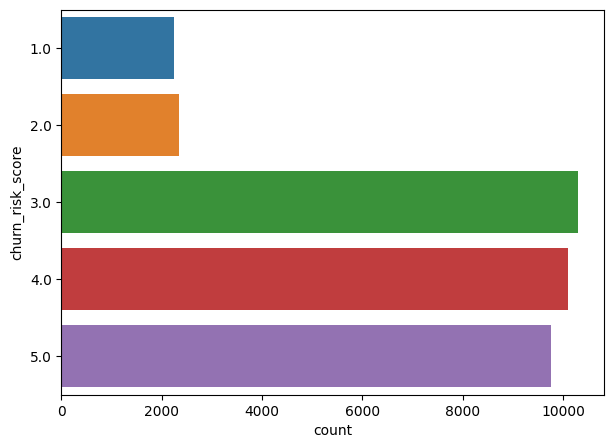

In [26]:
### Target column
plt.figure(figsize = (7,5))
sns.countplot(y = 'churn_risk_score'  , data = df2)

### Undersampling

In [46]:
undersample = RandomUnderSampler()
# fit and apply the transform
X_rus, y_rus = undersample.fit_resample(X, y)
print(Counter(y_rus))

Counter({1.0: 2236, 2.0: 2236, 3.0: 2236, 4.0: 2236, 5.0: 2236})


accuracy 0.7732558139534884
precision 0.7746199615654614
recall 0.775265536804385
F1 0.7748676529256684
Classification Report
               precision    recall  f1-score   support

         1.0       0.76      0.74      0.75       458
         2.0       0.75      0.77      0.76       468
         3.0       0.92      0.93      0.93       417
         4.0       0.69      0.68      0.68       437
         5.0       0.76      0.75      0.76       456

    accuracy                           0.77      2236
   macro avg       0.77      0.78      0.77      2236
weighted avg       0.77      0.77      0.77      2236



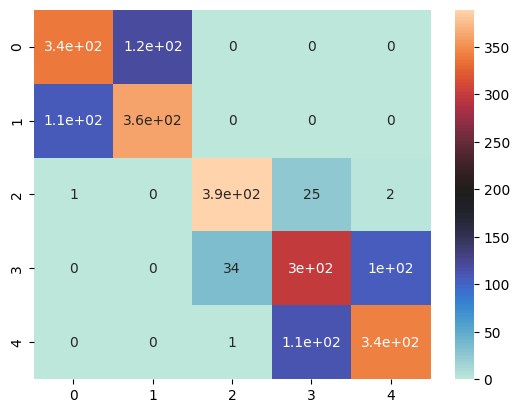

In [61]:
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus, test_size=.2, random_state=42)

pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', DecisionTreeClassifier(random_state = 42))
    ])
model = pipe.fit(X_rus_train, y_rus_train)
predictions = model.predict(X_rus_test)
evaluate_model(y_rus_test , predictions)

### Oversampling

In [31]:
# Tạo một đối tượng RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
# Áp dụng oversampling lên dữ liệu
X_ros, y_ros = oversampler.fit_resample(X, y)
print(Counter(y_ros))

Counter({2.0: 10303, 1.0: 10303, 5.0: 10303, 3.0: 10303, 4.0: 10303})


accuracy 0.8786761137532757
precision 0.8799219758628963
recall 0.8788892333430821
F1 0.8792503903457997
Classification Report
               precision    recall  f1-score   support

         1.0       0.99      0.99      0.99      2038
         2.0       0.99      0.99      0.99      2061
         3.0       0.94      0.93      0.93      2073
         4.0       0.69      0.73      0.71      2031
         5.0       0.79      0.76      0.77      2100

    accuracy                           0.88     10303
   macro avg       0.88      0.88      0.88     10303
weighted avg       0.88      0.88      0.88     10303



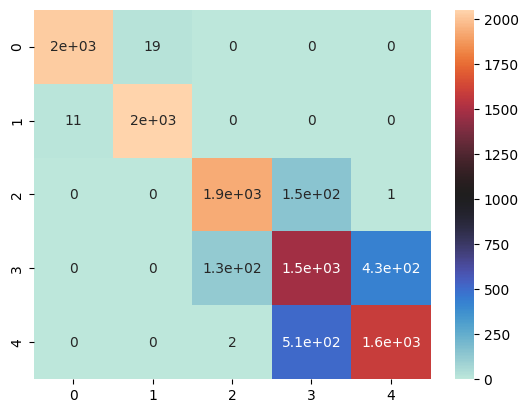

In [62]:
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(X_ros, y_ros, test_size=.2, random_state=42)

pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', DecisionTreeClassifier(random_state = 42))
    ])

model = pipe.fit(X_ros_train, y_ros_train)
predictions = model.predict(X_ros_test)
evaluate_model(y_ros_test , predictions)